<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: { equationNumbers: { autoNumber: "all" } }
});
</script>

<h1 align=center>Redes Neuronales Artificiales</h1>
<h3 align=center>19 Febrero 2018</h3>
<h4 align=center>Dr. Eduardo Ulises Moya</h4>
<h4 align=center>Ing. Abraham Sánchez</h4>
### Tabla de contenido:
<ul>
    <li><p><a href="#ref1">**1. Neuróna Biológica**</a></p></li>
    <ul>
        <li><p><a href="#ref1_1">1.1. Elementos de una neuróna biológica</a></p></li>
    </ul>
    <li><p><a href="#ref2">**2. Neuróna Artificial**</a></p></li>
    <ul>
        <li><p><a href="#ref2_1">2.1. Elementos de una neuróna artificial</a></p></li>
        <li><p><a href="#ref2_2">2.2. Funciones de activación</a></p></li>
    </ul>
    <li><p><a href="#ref3">**3. Modelo**</a></p></li>
    <ul>
        <li><p><a href="#ref3_1">3.1. Modelo matemático</a></p></li>
        <li><p><a href="#ref3_2">3.2. Etapa de aprendizaje</a></p></li>
    </ul>
    <li><p><a href="#ref4">**4. Perceptrón**</a></p></li>
    <ul>
        <li><p><a href="#ref4_1">Ejemplo</a></p></li>
    </ul>
    <li><p><a href="#ref5">**5. Backpropagation**</a></p></li>
    <ul>
        <li><p><a href="#ref5_1">5.1 Etapa hacia adelante (Feedforward)</a></p></li>
        <li><p><a href="#ref5_2">5.2 Etapa hacia atrás (Backpropagation)</a></p></li>
        <li><p><a href="#ref5_3">Ejemplo</a></p></li>
    </ul>
</ul>

<a id="ref1"></a>
<h2>**1. Neuróna Biológica**</h2>

Una red neuronal se define como una población de neuronas físicamente interconectadas 
o un grupo de neuronas aisladas que reciben señales que procesan a la manera de un 
circuito reconocible.

La comunicación entre neuronas, que implica un proceso electroquímico, implica que, 
una vez que una neurona es excitada a partir de cierto umbral, ésta se despolariza 
transmitiendo a través de su axón una señal que excita a neuronas aledañas, y así 
sucesivamente.

Las neuronas tienen tres componentes principales: las dendritas, el cuerpo de la célula
o soma y el axón.

<a id="ref1_1"></a>
<h3>**1.1. Elementos de una neuróna biológica**</h3>

- **Dendritas.** Elemento receptor; son como fibras nerviosas que cargan de señales eléctricas al cuerpo de la célula; durante el crecimiento aumenta el número de dendritas, pero luego predomina la especialización.
- **Soma.** Realiza la suma de esas señales. Incluye el núcleo, es donde principalmente se produce la energía.
- **Axón.** Es una fibra larga que lleva la señal desde el cuerpo de la célula hacia otras. El punto de contacto entre el axón de una célula y la dendrita de otra es llamado sinapsis.

<a id="ref2"></a>
<h2>**2. Neuróna Artificial**</h2>

El modelo de una neurona artificial es una imitación del proceso de una neurona biológica. Una neurona artificial es la unidad fundamental para la operación de una red neuronal artificial.

<a id="ref2_2"></a>
<h3>**2.2. Funciones de activación**</h3>

Las funciones de activación, denotadas por  $\varphi(.)$, definen la salida de la neurona.

<h4>Función escalón</h4>
\begin{equation}
\varphi(v) =
  \begin{cases}
    1       & \quad \text{if } v >= 0\\
    0       & \quad \text{if } v < 0
  \end{cases}
\end{equation}

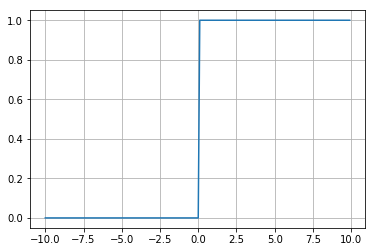

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step function
def step(v):
    v = v >= 0
    return v*1

l = np.array(np.arange(-10, 10, 0.1))

plt.plot(l, step(l))
plt.grid()
plt.show()

<h4>Función sigmoidal</h4>
\begin{equation}
\varphi(v) = \frac{1}{1+e^-v}
\end{equation}

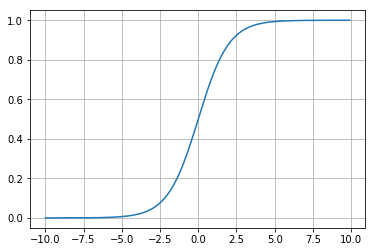

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

l = np.array(np.arange(-10, 10, 0.1))
f = sigmoid(l)

plt.plot(l, sigmoid(l))
plt.grid()
plt.show()

<h4>Función ReLU</h4>
\begin{equation}
\varphi(v) = max(0,v)
\end{equation}

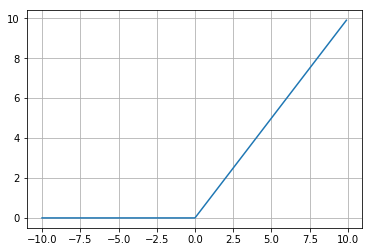

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

def relu(v):
    return v*(v>0)

l = np.array(np.arange(-10, 10, 0.1))

plt.plot(l, relu(l))
plt.grid()
plt.show()

<a id="ref2_1"></a>
<h3>**2.1. Elementos de una neuróna artificial**</h3>

Basándose en el modelo biológico, se encuentran las siguientes analogías con el
sistema artificial:
- **Entradas** $X_i$. Representa las señales provenientes de otras neuronas, captadas por la dendritas.
- **Pesos** $W_i$. Representa la intensidad de la sinapsis que conecta dos neuronas. - **Umbral** $\theta$. Función umbral que la señal de la neurona debe sobrepasar para activarse (ocurre biológicamente en el cuerpo de la célula).
- **Salida** $y_i$. Valor de salida de la neurona.

<a id="ref3"></a>
<h2>**3. Modelo**</h2>

La neurona es la unidad de proceso de información fundamental en una red neuronal y su básico modelo se compone de lo siguiente:
<br>
- **Enlaces de conexión**. Parametrizados por los pesos sinápticos $𝑊_𝑖$. Si $𝑊_𝑖 > 0$ entonces la conexión es excitadora así mismo si $𝑊_𝑖 < 0$ la conexión es inhibidora.
- **Sumador**. Suma los componentes de las señales de entrada multiplicadas por $𝑊_𝑖$.
- **Función de activación (Umbral)**. Transformación no lineal.

<a id="ref3_1"></a>
<h3>**3.1. Modelo matemático**</h3>

En términos matemáticos, es posible describir la neurona n de la figura anterior, por el siguiente par de ecuaciones.

\begin{equation}
v = \displaystyle\sum_{i=1}^{N} xw^T + b
\end{equation}

\begin{equation}
y = \varphi(v)
\end{equation}

donde $𝑥_1,𝑥_2,…,𝑥_𝑚$ son las señales de entrada; $𝑤_1,𝑤_2,…,𝑤_𝑚$ son los pesos sinápticos; $𝑢$ es la combinación lineal de las entradas  ponderadas; $𝑏$ es la polarización; $\varphi(.)$ es la función de activación; $𝑦$ es la señal de salida de la neurona.

<a id="ref3_2"></a>
<h3>**3.2. Etapa de aprendizaje**</h3>

El aprendizaje es un proceso por el cual los parámetros se adaptan, por la interacción continua con el medio ambiente. El tipo de aprendizaje está determinado por la forma en que se realiza dicha adaptación.

Este proceso implica la siguiente secuencia de eventos:
<ul>
<li>La red neuronal es estimulada por el medio ambiente (datos de entrada).</li>
<li>La red neuronal ajusta sus parámetros (pessos).</li>
<li>La red neuronal genera una respuesta (función de activación).</li>
<li>Detenerse hasta que el error sea el minimo aceptable (i.e. 0.01) o en el caso del perceotrón, que todas sus salidas sean iguales a las deseadas.</li>
</ul>

Los pesos de la red neuronal de la figura se ajustan bajo el siguiente mecanismo:

\begin{equation}
w(k+1) = w(k) + e(k)x(k)\eta
\end{equation}

En donde $w$ es la matriz de pesos; $e$ es el error; $x$ es la matriz de entradas; $\eta$ es la taza de aprendizaje.

Para el bias:

\begin{equation}
b(k+1) = b(k) + e(k)\eta
\end{equation}

A este mécanismo también se le conoce como <b>filtro adaptativo</b>.

<a id="ref4"></a>
<h2>**4. Perceptrón**</h2>

El perceptrón es la forma más simple de una red neuronal utilizada para la clasificación de patrones <b>linealmente separables</b> (patrones que se localizan en los lados opuestos de un hiperplano).

Básicamente consiste en una sola neurona con pesos ajustables y un bias.

<a id="ref4_1"></a>
<h2>**Ejemplo**</h2>

A continuación se presenta un ejemplo de una red neurona artificial tipo perceptron la cual tiene como objetivo encontrar una solución a una compuerta lógica AND, es decir, se deben encontrar los pesos que puedan clasificar linealmente los puntos de dicha compuerta.

Datos de entrada:

\begin{equation}
X = 
 \begin{pmatrix}
  0 & 0\\
  0 & 1\\
  1 & 0\\
  1 & 1
 \end{pmatrix}
\end{equation}

Vector objetivo:

\begin{equation}
t = 
 \begin{pmatrix}
  0\\
  0\\
  0\\
  1
 \end{pmatrix}
\end{equation}


In [4]:
# Import numpy
import numpy as np # Numeric library python
import matplotlib.pyplot as plt # Plot

In [5]:
# Defining constants
MAX_EPOCH = 10000
ETA=0.05

In [6]:
# Activation Function (STEP)
def step(v):
    if v < 0: return 0,
    return 1

In [7]:
# Input data X (dataset)
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

In [8]:
# Target data t
t = np.array([[0],
              [0],
              [0],
              [1]])

In [9]:
# Weights
# Weights are randomly initialized
w = np.random.rand(np.size(t[1,:]), np.size(x[1,:]))
# Bias
b = np.random.rand(1, np.size(t[1,:]))

In [10]:
# Training function
flag = False
epoch = 0

print ("Training...")
while not flag and epoch < MAX_EPOCH:
    flag = True
    for k in range(0, len(x[:,1])):
        v = np.dot(x[k,:], w.T) + b
        y = step(v)
        e = t[k] - y
        if y != t[k]:
            w = w + (e * x[k,:] * ETA)
            b = b + (e * ETA)
            flag = False
    epoch += 1
print ("Epoch:", epoch)
print ("Finished.")

Training...
Epoch: 13
Finished.


In [11]:
# Show training data
print ("\"Statistics\"")
print ("Learning rate: ", ETA, "\n")
print ("Weights after training..\n")
print ("W:\n", w)
print ("b:\n", b)

"Statistics"
Learning rate:  0.05 

Weights after training..

W:
 [[ 0.39129631  0.10071859]]
b:
 [[-0.47179555]]


In [12]:
# Simulation
print ("\n\"Simulation\"")
print ("Target:\n", t)
print ("\nResult:\n")
res = np.zeros(np.shape(t))
for k in range(0, len(x[:,1])):
    v = np.dot(x[k,:], w.T) + b
    y = step(v)
    res[k] = y
print (res)


"Simulation"
Target:
 [[0]
 [0]
 [0]
 [1]]

Result:

[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]


In [13]:
# Get two point (P1(x1,y1), P2(x2,y2)) and plot line in the hyperplane\n",
# Ax + By + C = 0\n",
weights = w
bias = b
A = weights[0][0]
B = weights[0][1]
C = bias[0][0]
x1 = np.max(x)+1
x2 = np.min(x)-1

# In order to find one of the point we have:\n",
y1 = (-C-A*x1)/B
y2 = (-C-A*x2)/B

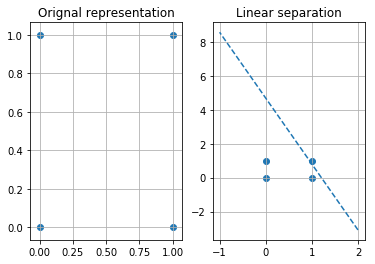

In [14]:
# Plot
plt.ylim([x2,x1])
plt.xlim([x2,x1])
m,n = x.T

plt.subplot(121)
plt.grid()
plt.title('Orignal representation')
plt.scatter(m,n)
plt.subplot(122)
plt.grid()
plt.title('Linear separation')
plt.scatter(m,n)
plt.plot([x1, x2],[y1, y2], '--')
plt.show()

<a id="ref5"></a>
<h2>**5. Backpropagation**</h2>

En 1969 Minsky y Papert publicaron su libro Perceptrons: **"An introduction to computational geometry"**, el cual significó un gran estancamiento en la teoría de redes neuronales. En él, se presentaba un análisis detallado del Perceptrón, en términos de sus capacidades y limitaciones, en especial en cuanto a las restricciones que existen para los problemas que una red tipo Perceptrón puede resolver. La mayor desventaja de este tipo de redes es su <b>incapacidad para resolver problemas de clasificación que no sean linealmente separables</b>.

El Perceptrón multicapa, inicialmente desarrollado por P. Werbos (1974) permite resolver este problema. Posee una estructura con al menos una capa oculta; y su algoritmo de entrenamiento es del tipo corrección de error. Implementa el gradiente distribuido en los diferentes componentes de la red.

Las redes neuronales tipo Perceptrón multicapa (<b>MLP</b>), han sido aplicadas satisfactoriamente para resolver muy diversos y difíciles problemas por medio del algoritmo conocido como retropropagación.

El algoritmo de retropropagación consta de dos etapas:
1. **Etapa hacia adelante.**
Parámetros de la red fijos. Se presenta la señal de entrada a la red, que se propaga hacia adelante para producir la salida.
2. **Etapa hacia atrás.**
El error entre la salida deseada y la red se propaga hacia atrás. Los parámetros de la red se modifican para minimizar el cuadrado de dicho error.

El MLP tiene tres características distintivas:
<ul>
<li><i>El modelo de cada neurona en la red incluye una función de activación no lineal</i>. Lo importante aquí es que la nolinealidad es suave (diferenciable en cualquier punto), lo opuesto a la función signo utilizada en el Perceptrón. Una de las funciones de activación más utilizadas es la logística.</li>

<li><i>La red contiene una o más capas ocultas que no son parte de las entradas o las salidas de la red</i>. Estas neuronas ocultas permiten que la red aprenda tareas complejas por la extracción progresiva de las características principales de los patrones de entrada.</li>

<li><i>La red presenta altos grados de conectividad, determinados por las sinapsis de la red</i>. La combinación de estas características junto a la habilidad de aprender de la experiencia a través del entrenamiento del MLP da como resultado un
gran potencial de computación.</li>
</ul>

<a id="ref5_1"></a>
<h3>**5.1 Etapa hacia adelante (Feedforward)**</h3>

Para cada neurona de cada capa se calcula: salida de la capa oculta y salida de la capa de salida.

Capa oculta:

\begin{equation}
v_h(k)=\displaystyle\sum_{k=1}^{N} x(k)W^T_h(k)
\end{equation}
\begin{equation}
y_h(k)=\varphi(v_h(k))
\end{equation}

Capa de salida:

Se realizan los mismos cálculos para obtener las salidas de las neuronas de salida.

\begin{equation}
v_o(k)=y_h(k)W^T_o(k)
\end{equation}
\begin{equation}
y_o(k)=\varphi(v_o(k))
\end{equation}

El sub-índice $h$ representa la capa oculta, sub-índice $o$ es la capa de salida y sub-índice $k$ es la iteración para cada patrón de los datos de entrada.

<a id="ref5_2"></a>
<h3>**5.2 Etapa hacia atrás (Backpropagation)**</h3>

Ya sabemos que para obtener el error se realiza una diferencia entre el valor deseado $t(k)$ y el valor obtenido $y_o(k)$, sabiendo esto, el propósito de este paso es propagar este error hacia cada una de las capas anteriores hasta llegar a la primera capa, esto debido a que las capas intermedias (capas ocultas) desconocen el valor del error, esto solo lo sabe la capa final ya que esta es la que compara su salida contra el valor deseado.

En este contexto, se pueden identificar dos casos distintos, dependiendo de la ubicación de la neurona:

**Caso 1.** La neurona es un nodo de salida. Como la neurona está en la salida entonces es posible determinar el valor de e(k) como y consecuentemente el valor del gradiente local se determina directamente de la ecuación.

**Caso 2.** La neurona es una neurona oculta. Cuando la neurona se localiza en alguna de las capas ocultas no está disponible el valor deseado para la salida de dicha neurona. Por lo cual la señal de error de dicha neurona se debe determinar de manera recursiva en término de la señal de error de las neuronas de salida.

Para esta presentación no se entrará en como obtener la actualización de los pesos, solamente se limitará a mostrar las ecuaciones necesarias para hacerlo.

Actualización de pesos para la capa de salida:

\begin{equation}
W_o(k+1)=W_o(k)+\Delta W_o(k)
\end{equation}
\begin{equation}
W_o(k+1)=W_o(k)+\eta \delta(k)y_h(k)
\end{equation}

Actualización de pesos para las capas ocultas:

\begin{equation}
W_h(k+1)=W_h(k)+\Delta W_h(k)
\end{equation}
\begin{equation}
W_h(k+1)=W_h(k)+\eta x(k)\varphi '(v_h(k)) \displaystyle\sum \delta(k) W_o(k)
\end{equation}

Al igual que el perceptrón, estas ecuaciones permitirán actualizar los pesos en relación del error.

<a id="ref5_3"></a>
<h3>**Ejemplo**</h3>

Un problema famoso y conocido por la comunidad como un problema no linealmente separable es la resolución de la compuerta lógica XOR, la cual se representa de la siguiente forma:

Datos de entrada:

\begin{equation}
X = 
 \begin{pmatrix}
  0 & 0\\
  0 & 1\\
  1 & 0\\
  1 & 1
 \end{pmatrix}
\end{equation}

Vector objetivo:

\begin{equation}
t = 
 \begin{pmatrix}
  0\\
  1\\
  1\\
  0
 \end{pmatrix}
\end{equation}

Gráficamente:

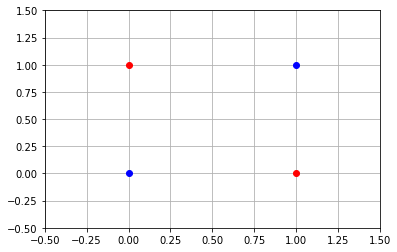

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.ylim([-0.5,1.5])
plt.xlim([-0.5,1.5])
plt.plot(0,0,'bo')
plt.plot(0,1,'ro')
plt.plot(1,0,'ro')
plt.plot(1,1,'bo')
plt.grid()
plt.show()

Supone que, los circulos rojos son la clase 1 y los circulos azules la clase dos. El objetivo consiste en utilizar una linea que permita separar linealmente una clase de la otra en un plano 2D, imposible, ¿Cierto?. Debido a que una sola neurona (por ejemplo, considerando al perceptrón) puede trazar una sola linea recta, le resulta una tarea prácticamente imposible. Para resolver este tipo de problemas se requiere que se trace más de una linea para poder clasificar de forma correcta; a pesar de seguir trazando lineas rectas es posible que utilizando más de una se logre la clasificación. Por ejemplo, observa la siguiente gráfica:

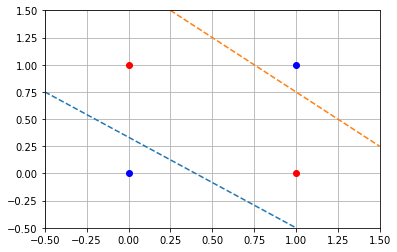

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.ylim([-0.5,1.5])
plt.xlim([-0.5,1.5])
plt.plot(0,0,'bo')
plt.plot(0,1,'ro')
plt.plot(1,0,'ro')
plt.plot(1,1,'bo')
plt.plot([-0.5,1],[0.75,-0.5],'--')
plt.plot([0.25,1.5],[1.5,0.25],'--')
plt.grid()
plt.show()

A continuación se presenta la implementación en lenguaje Python.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Define some constants
ETA=0.03 # Learning rate
LAYERS = 2 # Number of neurons in hidden layer
MIN_ERROR = 0.01 # Max allowed error

In [19]:
# Define activation function
# Activation Function, SIGMOIDE
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Activation Function, DERIVATIVE SIGMOIDE
def d_sigmoid(z):
    ds = z * (1 - z)
    return ds

In [20]:
# Define XOR gate
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

t = np.array([[0],
              [1],
              [1],
              [0]])

In [21]:
# Weights
# Hidden layer weights
wh = np.random.rand(LAYERS, np.size(x[1,:]))
# Output layer weights
wo = np.random.rand(1, LAYERS)

In [22]:
# Training
av_e = 1
loss = []
epoch = 0
print ("Training... it might take a while, depends of number of neurons set in the hidden layer,"
       " the learning rate and the error.\n")
while av_e > MIN_ERROR:
    E = np.zeros(np.shape(t))
    for k in range(0, len(x[:,1])):
        vh = np.dot(x[k,:], wh.T)
        yh = sigmoid(vh)
        vo = np.dot(yh, wo.T)
        yo = sigmoid(vo)
        e = t[k] - yo
        eo = d_sigmoid(yo) * e
        eh = np.multiply(d_sigmoid(yh), eo * wo)
        #eh = d_sigmoid(yh) * eo * wo
        wo = wo + (eo * yh * ETA)
        wh = wh + (eh.T * x[k,:] * ETA)
        E[k] = e**2
    av_e = np.sum(E)/len(x[:,1])
    loss.append(av_e)
    epoch += 1
print ("Epoch:", epoch)
print ("Finished.")

Training... it might take a while, depends of number of neurons set in the hidden layer, the learning rate and the error.

Epoch: 173768
Finished.


In [23]:
# Show statistic data
print ("\"Statistics\"\n")
print ("Learning rate: ", ETA)
print ("Hidden layers: ", LAYERS)
print ("Weights after training..\n")
print ("Wh:\n", wh)
print ("Wo:\n", wo)

"Statistics"

Learning rate:  0.03
Hidden layers:  2
Weights after training..

Wh:
 [[ 0.90972296  0.90965143]
 [ 7.35975713  7.36095746]]
Wo:
 [[-27.8595898   22.07955498]]


In [24]:
# Simulation
print ("\n\"Simulation\"")
print ("Target:\n", t)
print ("\nResult:\n")
# Simulation
res = np.zeros(np.shape(t))
for k in range(0, len(x[:,1])):
        vh = np.dot(x[k,:], wh.T)
        yh = sigmoid(vh)
        vo = np.dot(yh, wo.T)
        yo = sigmoid(vo)
        res[k] = yo
print (res)


"Simulation"
Target:
 [[0]
 [1]
 [1]
 [0]]

Result:

[[ 0.05264925]
 [ 0.90057462]
 [ 0.90053659]
 [ 0.13085941]]


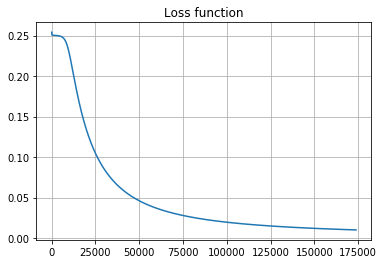

In [25]:
# Loss function
plt.title("Loss function")
plt.plot(loss)
plt.grid()
plt.show()